In [7]:
import os
import cv2
import numpy as np


def gaussian_noise(x_data,y_label):
  new_x = []
  new_y = []
  for i in range(len(x_data)):

    row, col, ch = 150,150,3
    mean = 0
    sigma = 15
  
    gauss = np.random.normal(mean, sigma,(row,col,ch))
    gauss = gauss.reshape(row,col, ch)
    gauss_img = x_data[i] + gauss
    new_x.append(gauss_img)
    new_y.append(y_label[i])
  return new_x, new_y
   
def pepper_noise(x_data,y_label):
  
  new_x = []
  new_y = []
  for i in range(len(x_data)):

    row, col,ch = 150,150,3
    s_vs_p = 0.5
    amount = 0.004
    sp_img = x_data[i].copy()

    num_pepper = np.ceil(amount* 67500 * (1. - s_vs_p))
    coords = [np.random.randint(0, i-1 , int(num_pepper)) for i in (150,150,3)]
    sp_img[coords[:-1]] = (0,0,0)
    new_x.append(sp_img)
    new_y.append(y_label[i])

  return new_x,new_y


def salt_noise(x_data,y_label):

  new_x = []
  new_y = []
  for i in range(len(x_data)):

    row,col,ch = 150,150,3
    s_vs_p = 0.5
    amount = 0.004
    sp_img = x_data[i].copy()


    num_salt = np.ceil(amount * 67500 * s_vs_p)
    coords = [np.random.randint(0, i-1 , int(num_salt)) for i in (150,150,3)]
    sp_img[coords[:-1]] = (255,255,255)
    new_x.append(sp_img)
    new_y.append(y_label[i])
  return new_x,new_y



In [8]:
import matplotlib.pyplot as plt 
import os 
import numpy as np

def plot_graph(history,epoch):  
  plt.plot(np.arange(epoch)+1, history['mean_absolute_error'], label='mae')
  plt.plot(np.arange(epoch)+1, history['val_mean_absolute_error'],label='val_mae')
  plt.xlabel('epoch')
  plt.title('mae and val_mae in breast_ai')
  plt.legend()
  plt.show()
  
   
  plt.plot(np.arange(epoch)+1, history['loss'], label='loss')
  plt.plot(np.arange(epoch)+1, history['val_loss'],label='val_loss')
  plt.xlabel('epoch')
  plt.title('loss and val_loss in breast_ai')
  plt.legend()
  plt.show()



 25%|██▌       | 5/20 [00:00<00:00, 43.36it/s]

start loading...


100%|██████████| 20/20 [00:00<00:00, 95.69it/s]


loading has finished!


/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`


Build model!


/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Train on 640 samples, validate on 80 samples
Epoch 1/50
640/640 [==============================] - 228s 356ms/step - loss: 1559091792.9081 - mean_absolute_error: 19095.6967 - val_loss: 128997.8156 - val_mean_absolute_error: 298.5181
Epoch 2/50
640/640 [==============================] - 213s 332ms/step - loss: 20740.7050 - mean_absolute_error: 90.2498 - val_loss: 849.3526 - val_mean_absolute_error: 23.6564
Epoch 3/50
640/640 [==============================] - 215s 336ms/step - loss: 474.0627 - mean_absolute_error: 16.6823 - val_loss: 253.9478 - val_mean_absolute_error: 12.6878
Epoch 4/50
640/640 [==============================] - 211s 330ms/step - loss: 111.7067 - mean_absolute_error: 8.0607 - val_loss: 41.4230 - val_mean_absolute_error: 4.7548
Epoch 5/50
640/640 [==============================] - 210s 329ms/step - loss: 24.3445 - mean_absolute_error: 3.7962 - val_loss: 24.9364 - val_mean_absolute_error: 3.5880
Epoch 6/50
640/640 [==============================] - 209s 327ms/step - loss

Epoch 49/50
640/640 [==============================] - 205s 321ms/step - loss: 0.0716 - mean_absolute_error: 0.2144 - val_loss: 9.0113 - val_mean_absolute_error: 2.5402
Epoch 50/50
640/640 [==============================] - 205s 321ms/step - loss: 0.0869 - mean_absolute_error: 0.2358 - val_loss: 8.9739 - val_mean_absolute_error: 2.5366


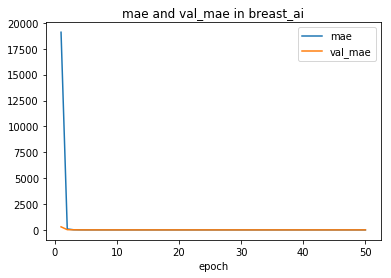

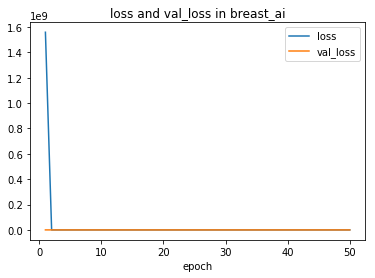

In [11]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.applications.vgg19 import VGG19
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
# import augmentation
from tqdm import tqdm
# import plot_learningcurve

os.environ['OPENCV_IO_ENABLE_JASPER']= '1'
#数値に変換
def trans_from_cup_to_int(name_value):
    name_array = ["A","B","C","D","E","F","G","H以上"]
    return name_array.index(name_value)

#データの読み込み
def load_data():
    print("start loading...")
    path = "data"
    name_list = [i for i in os.listdir(path) if i != '.DS_Store']
    pic_num = 0
    x_data = []
    y_label_data = []
    for name in name_list:
        label_value = trans_from_cup_to_int(name)
        pic_folder_path = path + "/" + name
        pic_list = [i for i in os.listdir(pic_folder_path) if i != '.DS_Store']
        for pic_name in tqdm(pic_list):
            pic_path = pic_folder_path+"/"+pic_name
            img = cv2.imread(pic_path)
            x_data.append(img)
            y_label_data.append(label_value)
    x_data = np.array(x_data)
    y_label_data = np.array(y_label_data)
    print("loading has finished!")
    return x_data, y_label_data

#データの大きさ揃える、とりあえず150*150で様子見
def resize_picture(images):
    changed_images = []
    for img in images:
        img = cv2.resize(img, dsize=(150, 150))
        changed_images.append(img)
    changed_images = np.array(changed_images)
    return changed_images

#データの切り取りによるかさまし、いらないかも
def make_more_data(images):
    trans_images = []
    for image in images:
        cut_img = img[img.shape[0]//6:img.shape[0]*5//6,img.shape[1]//6:img.shape[1]*5//6]
        trans_images.append(cut_img)
    images.extend(trans_images)
    return images

def build_model():
    base_model=VGG19(weights='imagenet',include_top=False,
                 input_tensor=Input(shape=(150,150,3)))

    model = Sequential()
    model.add(Flatten(input_shape=base_model.output_shape[1:]))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(30))
    model.add(Activation('relu'))
    model.add(Dense(30))
    model.add(Activation('relu'))
    model.add(Dense(1))
    
    model = Model(input=base_model.input,output=model(base_model.output))    

    for layer in base_model.layers[:15]:
        layer.trainable=False

    model.compile(Adam(lr=0.001),loss='mean_squared_error',metrics=['mae'])
    print("Build model!")
    return model
'''

def fit_model(model):
    samples_per_epoch = 20
    batch_size=32
    epochs = 10
    #とりあえずぼかし以外
    datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.3,
        horizontal_flip=True
    )
    #ここから下はこれを参照https://lp-tech.net/articles/Y56uo
    early_stopping = EarlyStopping(monitor='val_loss', patience=10 , verbose=1)
#     checkpointer = ModelCheckpoint(
#         model_weights,
#         monitor='val_loss',
#         verbose=1,
#         save_best_only=True
#         )
    print(Y_train.shape)
    history = model.fit_generator(
        datagen.flow(X_train, Y_train, batch_size=20),
        epochs = epochs,
      validation_data=(X_val,Y_val),
      steps_per_epoch=100
    )
    return model
'''

x_data, y_label_data = load_data()
x_data = resize_picture(x_data)
model = build_model()

random_seed = 0

epoch = 50

X_train, X_val, Y_train, Y_val = train_test_split(x_data, y_label_data, random_state=random_seed,test_size=0.5)
x,y = gaussian_noise(X_train,Y_train)
X_train = np.append(X_train,x,axis=0)

Y_train = np.append(Y_train,y)

x,y = pepper_noise(X_train,Y_train)

X_train = np.append(X_train,x,axis=0)
Y_train = np.append(Y_train,y)
x,y = salt_noise(X_train,Y_train)

X_train = np.append(X_train,x,axis=0)
Y_train = np.append(Y_train,y)
history = model.fit(X_train,Y_train,batch_size=32,epochs=epoch,verbose=1,validation_data=(X_val,Y_val)).history
plot_graph(history,epoch)
  
#model = fit_model(model)


In [14]:
y_pred = model.predict(X_val)

In [15]:
y_pred

array([[ 5.4249177 ],
       [ 2.8037326 ],
       [ 5.8937593 ],
       [ 2.2406528 ],
       [ 7.029654  ],
       [ 5.766913  ],
       [ 3.1973789 ],
       [ 1.7348849 ],
       [ 4.6453004 ],
       [ 5.5323243 ],
       [ 3.3189151 ],
       [ 3.5680606 ],
       [ 2.7360294 ],
       [ 4.4433656 ],
       [ 5.2406297 ],
       [ 4.3023133 ],
       [ 4.156958  ],
       [ 5.972983  ],
       [ 3.8833988 ],
       [-1.4447263 ],
       [ 3.2561252 ],
       [-3.5313962 ],
       [ 4.0155854 ],
       [ 6.15412   ],
       [ 5.81127   ],
       [ 2.092368  ],
       [ 4.7578187 ],
       [ 3.5019596 ],
       [ 4.0607514 ],
       [ 0.83028287],
       [ 4.706122  ],
       [-1.4810728 ],
       [ 2.7418125 ],
       [ 2.413489  ],
       [ 9.046058  ],
       [ 5.171622  ],
       [ 2.7863224 ],
       [ 6.3243775 ],
       [ 3.361655  ],
       [ 1.9818636 ],
       [ 4.834082  ],
       [ 1.6026217 ],
       [ 5.0696015 ],
       [ 2.357703  ],
       [ 0.3100955 ],
       [ 5

In [16]:
Y_val

array([3, 3, 1, 6, 5, 3, 4, 7, 2, 2, 4, 2, 0, 1, 3, 7, 5, 2, 4, 2, 5, 5,
       5, 6, 0, 0, 1, 7, 2, 4, 4, 0, 5, 2, 6, 7, 4, 6, 7, 4, 5, 0, 7, 1,
       3, 1, 4, 0, 3, 2, 5, 3, 6, 1, 0, 2, 7, 3, 6, 4, 2, 5, 7, 6, 1, 1,
       2, 2, 1, 4, 4, 5, 3, 1, 7, 3, 3, 7, 5, 5])

In [23]:
y_preds = []
for i in range(y_pred.shape[0]):
    y_preds.append(y_pred[i][0])

In [42]:
compare = []
for i in range(y_pred.shape[0]):
    compare.append(abs(y_preds[i]-Y_val[i]))